In [1]:
import ROOT

Welcome to JupyROOT 6.12/06


In [2]:
ROOT.gROOT.ProcessLine(".L common/spacecharge_includes.h+O");
ROOT.gROOT.ProcessLine(".L $GSL_LIB/libgsl.so");
ROOT.gROOT.ProcessLine(".L $UBOONECODE_LIB/libuboone_SpaceCharge.so");

In [3]:
pset = ROOT.fhicl.ParameterSet();
config = "EnableCorrSCE:false EnableSimSpatialSCE:true EnableSimEfieldSCE:true RepresentationType:Parametric InputFilename:\"SpaceCharge/SCEoffsets_MicroBooNE_E273.root\"";
ROOT.fhicl.make_ParameterSet(config,pset);
sce = ROOT.spacecharge.SpaceChargeMicroBooNE(pset);

In [4]:
pt = ROOT.geo.Point_t(200.0,100.0,100.0)
diff_vec = sce.GetPosOffsets(pt);
pt_offset = pt+diff_vec;
print "Position offsets: (%.3f,%.3f,%.3f)" % (diff_vec.X(),diff_vec.Y(),diff_vec.Z())
print "(%.2f,%.2f,%.2f) --> (%.2f,%.2f,%.2f)" % (pt.X(),pt.Y(),pt.Z(),pt_offset.X(),pt_offset.Y(),pt_offset.Z())

Position offsets: (-1.359,-8.998,0.784)
(200.00,100.00,100.00) --> (198.64,91.00,100.78)


In [5]:
def SpaceChargeMagnitudeZ(x,par):
    mypt=ROOT.geo.Point_t(x[0],x[1],par[0])
    return sce.GetPosOffsets(mypt).R();

fSCE_mag_zproj = ROOT.TF2("fSCE_mag_zproj",SpaceChargeMagnitudeZ,0.0,256.,-116.5,116.5,1);

In [6]:
import time
from IPython import display

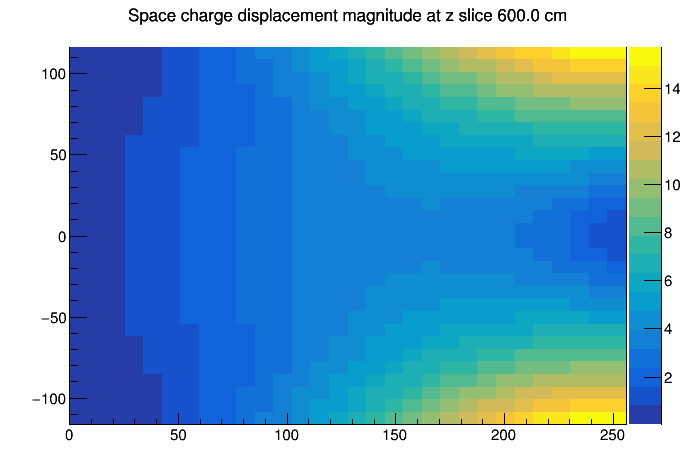

In [ ]:
c = ROOT.TCanvas("c")
while(True):
    for i in [x * 100. for x in range(0, 11)]:
        title = "Space charge displacement magnitude at z slice %.1f cm" % i
        fSCE_mag_zproj.SetTitle(title)
        fSCE_mag_zproj.SetParameter(0,i);
        fSCE_mag_zproj.Draw("colz")
        #c.Draw()
        c.SaveAs("tmp.png")
        display.clear_output(wait=True)
        img = display.Image(filename="tmp.png")
        display.display(img)
        time.sleep(1)